# Chapter 12 - Backtesting Trading Strategies

In this Notebook you can find additional content that did not make it to the book.

## B.1 Event-driven Backtesting with `backtrader`

This recipe below contains the same trading strategy (based on the simple moving average) as the one in the book, however, implemented using `backtrader`'s `Signal` approach.

### How to do it...

1. Import the libraries:

In [1]:
from datetime import datetime
import backtrader as bt

2. Define a class representing the trading strategy:

In [2]:
class SmaSignal(bt.Signal):
    params = (("period", 20), )
    
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)

3. Download data from Yahoo Finance:

In [3]:
data = bt.feeds.YahooFinanceData(dataname="AAPL", 
                                 fromdate=datetime(2021, 1, 1),
                                 todate=datetime(2021, 12, 31))

4. Set up the backtest:

In [4]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

5. Run the backtest:

In [5]:
print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1048.01


6. Plot the results:

In [ ]:
cerebro.plot(iplot=True, volume=False)

## B.2 Loading custom data to `backtrader`

Below, you can see how to backtest the same strategy, this time using manually downloaded data from Yahoo Finance (using the `yfinance` library). After downloading the data and storing it in a `pandas` DataFrame, we feed it into the backtesting framework.

The same example can be inspected in `backtrader_strategies/sma_signal.py`.

### How to do it...

1. Import the libraries:

In [6]:
from datetime import datetime
import backtrader as bt
import yfinance as yf

2. Define a class representing the trading strategy:

In [7]:
class SmaSignal(bt.Signal):
    params = (("period", 20), )
    
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)

3. Download data from Yahoo Finance:

First, we download the adjusted prices from Yahoo Finance using the `yfinance` library:

In [8]:
aapl_df = yf.download("AAPL", 
                      start="2021-01-01", 
                      end="2021-12-31",
                      progress=False,
                      auto_adjust=True)

aapl_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.088923,133.744048,130.746367,131.709198,99116600
2021-01-04,132.533082,132.622413,125.823047,128.453461,143301900
2021-01-05,127.937286,130.766226,127.480679,130.041611,97664900
2021-01-06,126.775939,130.081327,125.445840,125.664215,155088000
2021-01-07,127.411211,130.657044,126.914907,129.952286,109578200


Then, we feed the DataFrame to `backtrader` using `bt.feeds.PandasData`. For more information, please refer to the [official documentation](https://www.backtrader.com/docu/pandas-datafeed/pandas-datafeed/).

In [9]:
data = bt.feeds.PandasData(dataname=aapl_df)

4. Set up the backtest:

In [10]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

5. Run the backtest:

In [11]:
print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1048.03


The small difference in results can be easily caused by different approximation of the stock prices.

6. Plot the results:

In [ ]:
cerebro.plot(iplot=True, volume=False)

## B.3 Analyzing the results with `pyfolio`

### How to do it...

1. Import the libraries:

In [1]:
from datetime import datetime
import backtrader as bt
import pyfolio as pf

/opt/homebrew/Caskroom/miniforge/base/envs/pff2/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


2. Define a class representing the trading strategy:

In [2]:
class SmaSignal(bt.Signal):
    params = (("period", 20), )
    
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)

3. Download data from Yahoo Finance:

In [3]:
data = bt.feeds.YahooFinanceData(dataname="AAPL", 
                                 fromdate=datetime(2021, 1, 1),
                                 todate=datetime(2021, 12, 31))

4. Set up the backtest:

In [4]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

5. Run the backtest:

In [5]:
backtest_result = cerebro.run()


6. Access the `pyfolio` analyzers:

In [6]:
pyfolio_analyzer = backtest_result[0].analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfolio_analyzer.get_pf_items()

In [7]:
transactions

,amount,price,sid,symbol,value
date,,,,,
2021-02-02 23:59:59.999989+00:00,1,134.73,0,AAPL,-134.73
2021-02-12 23:59:59.999989+00:00,-1,133.56,0,AAPL,133.56
2021-03-17 23:59:59.999989+00:00,1,123.32,0,AAPL,-123.32
2021-03-19 23:59:59.999989+00:00,-1,119.19,0,AAPL,119.19
2021-03-23 23:59:59.999989+00:00,1,122.60,0,AAPL,-122.60
2021-03-25 23:59:59.999989+00:00,-1,118.83,0,AAPL,118.83
2021-04-01 23:59:59.999989+00:00,1,122.93,0,AAPL,-122.93
2021-05-03 23:59:59.999989+00:00,-1,131.26,0,AAPL,131.26
2021-06-07 23:59:59.999989+00:00,1,125.64,0,AAPL,-125.64


7. Print the tear sheet:

Start date,2021-01-04
End date,2021-12-30
Total months,11
,Backtest
Annual return,4.821%
Cumulative returns,4.801%
Annual volatility,2.526%
Sharpe ratio,1.88
Calmar ratio,4.25
Stability,0.78
Max drawdown,-1.135%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,1.14,2021-02-04,2021-04-01,2021-04-13,49
1,0.92,2021-12-10,2021-12-20,2021-12-27,12
2,0.88,2021-07-14,2021-09-10,2021-10-28,77
3,0.50,2021-11-24,2021-11-26,2021-11-30,5
4,0.43,2021-10-28,2021-11-10,2021-11-18,16


/opt/homebrew/Caskroom/miniforge/base/envs/pff2/lib/python3.9/site-packages/pandas/core/indexes/base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


Stress Events,mean,min,max
New Normal,0.02%,-0.67%,0.57%


Top 10 long positions of all time,max
AAPL,17.15%


Top 10 short positions of all time,max


Top 10 positions of all time,max
AAPL,17.15%


/opt/homebrew/Caskroom/miniforge/base/envs/pff2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


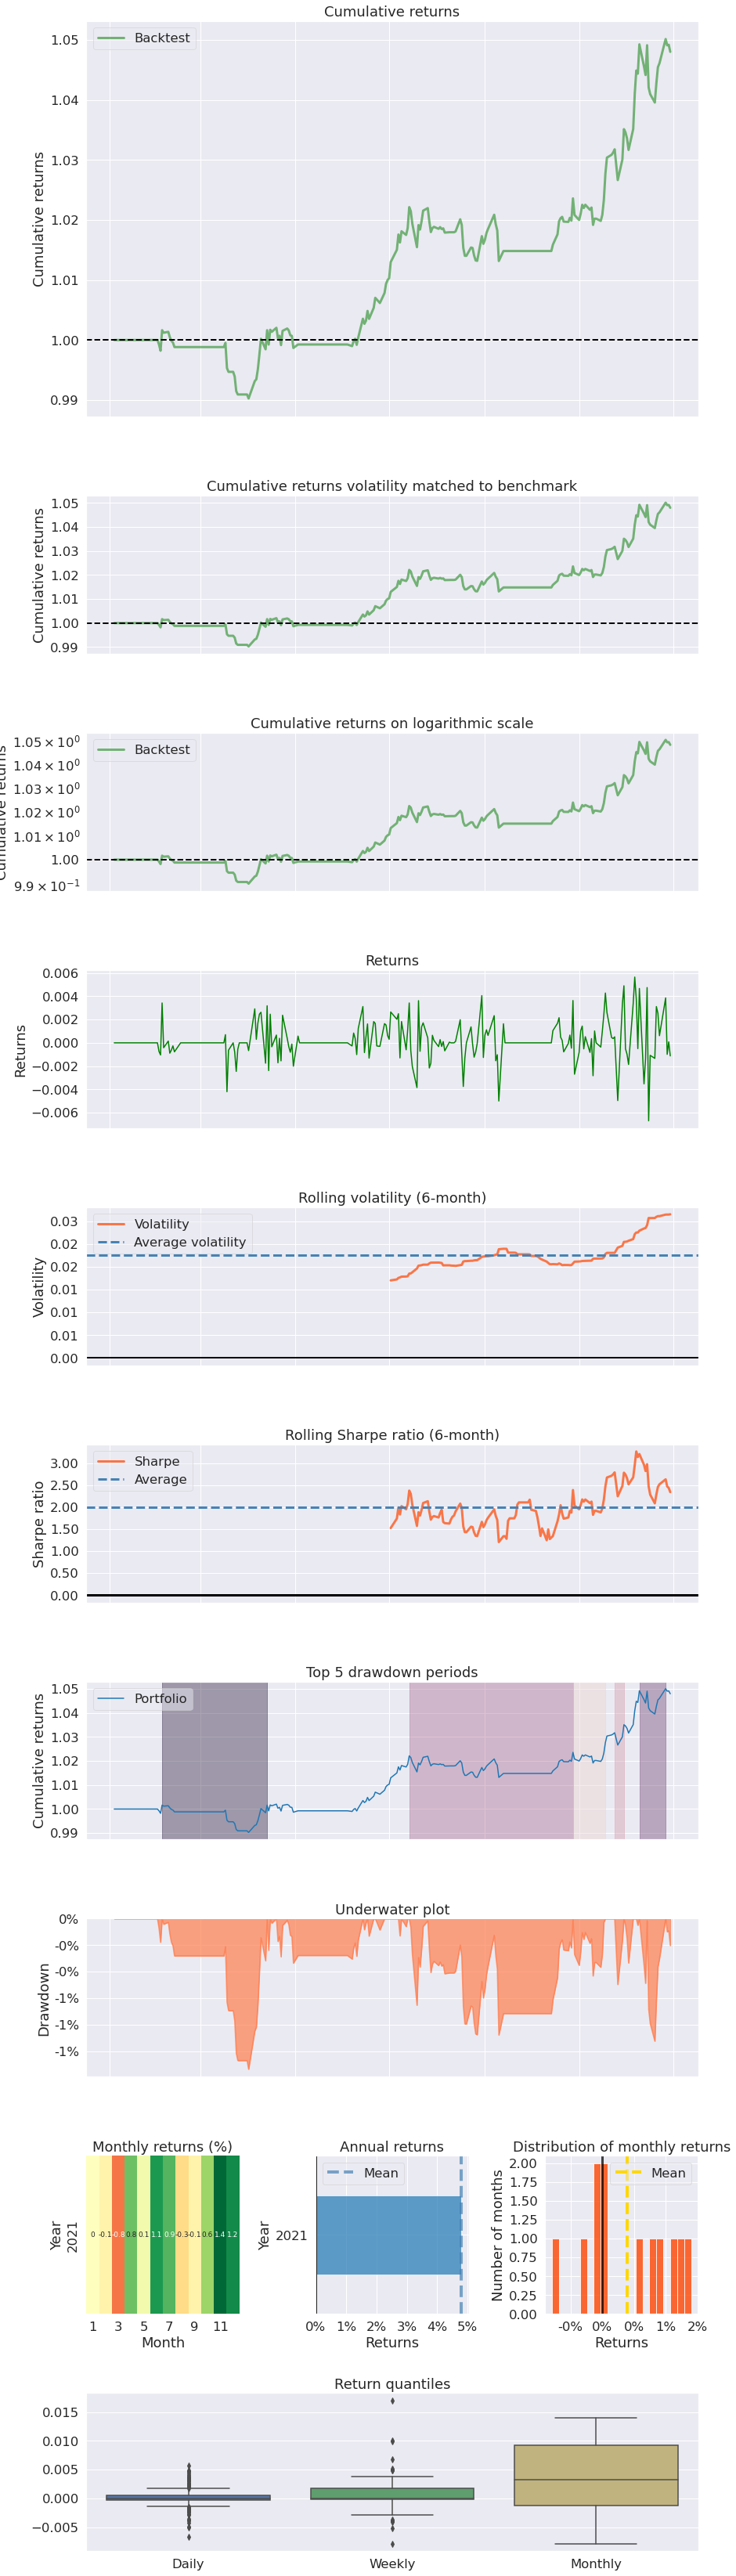

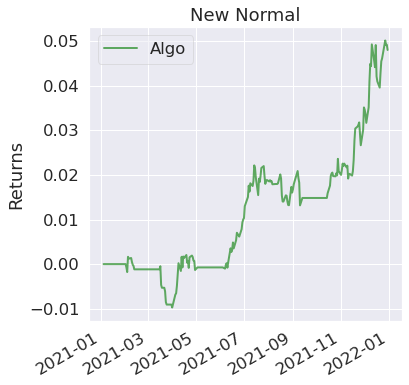

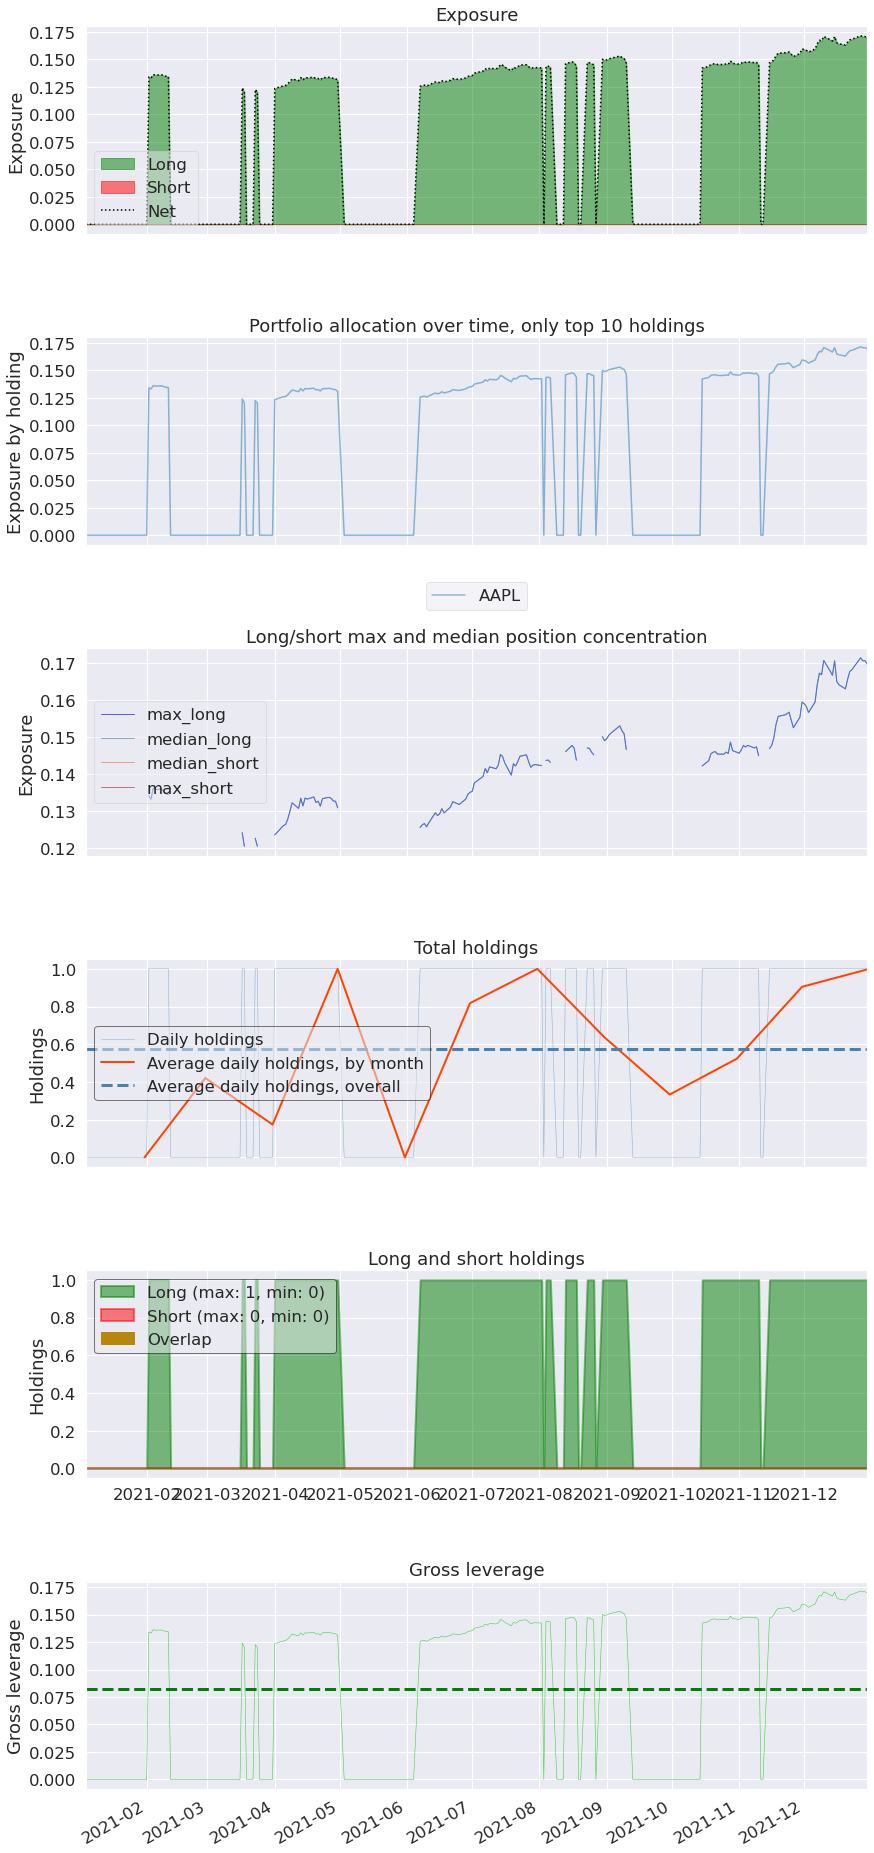

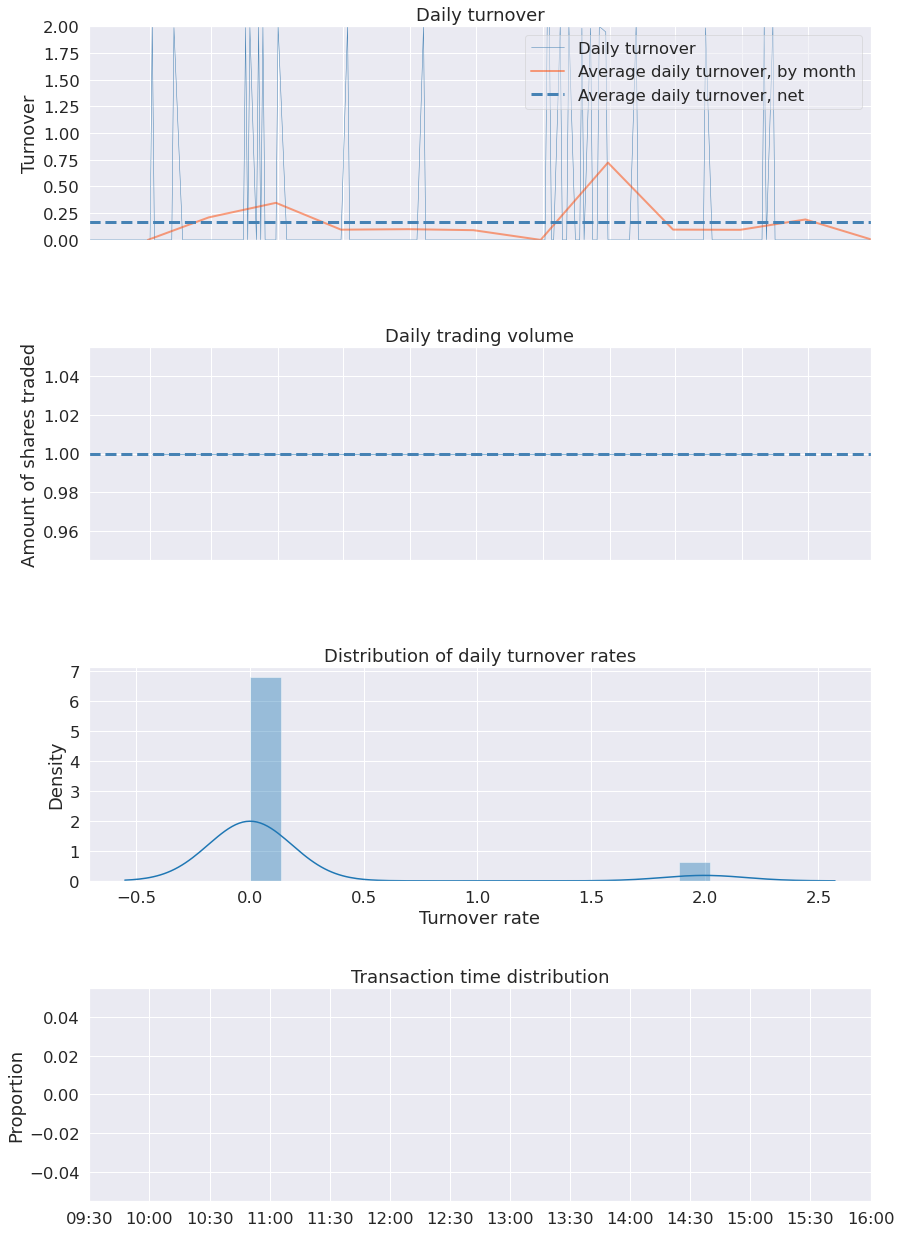

In [8]:
pf.create_full_tear_sheet(returns,
                          transactions=transactions,
                          positions=positions)